In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import pickle

filename5 = 'df_all'
infile5 = open(filename5,'rb')
df_all = pickle.load(infile5)
infile5.close()

In [2]:
pd.set_option('display.max_columns',500)

df_all = df_all.drop(columns = 'League')
df_all = df_all.drop(columns = 'Team')
df_all = df_all.dropna().reset_index(drop=True)

In [3]:
# making dual nba positions into respective most frequent positions
df_all.at[229, 'Pos'] = 'SF'
df_all.at[479, 'Pos'] = 'PG'
df_all.at[487, 'Pos'] = 'SF'
df_all.at[710, 'Pos'] = 'C'
df_all.at[1198, 'Pos'] = 'PG'
df_all.at[1210, 'Pos'] = 'SF'
df_all.at[1245, 'Pos'] = 'PG'
df_all.at[1295, 'Pos'] = 'PG'
df_all.at[1325, 'Pos'] = 'SG'
df_all.at[1368, 'Pos'] = 'C'
df_all.at[1421, 'Pos'] = 'PG'
df_all.at[1451, 'Pos'] = 'PG'
df_all.at[1504, 'Pos'] = 'SG'
df_all.at[1517, 'Pos'] = 'C'
df_all.at[1984, 'Pos'] = 'PF'
df_all.at[2337, 'Pos'] = 'C'

In [5]:
# if rookie, pts previous equal to rookie ppg
df_all['PTS_PREV'] = np.where(df_all['PTS_PREV'] == 'None', df_all['PTS'], df_all['PTS_PREV'])

In [6]:
numeric_list = ['Age','GP', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'PTS_PREV', 'Star', 'Cum_Star']
for numeric in numeric_list:
    df_all[numeric] = pd.to_numeric(df_all[numeric])

df_all = df_all.fillna(0)

In [7]:
df_all['Year_Age'] = df_all['Year']-1986
df_all['PTS_DIFF'] = df_all['PTS'] - df_all['PTS_PREV']

In [8]:
df_all['PREV_STARS'] = df_all['Cum_Star']
# df_all['PREV_STARS'] = np.where(df_all['Star'] == 1, df_all['PREV_STARS']-1, df_all['PREV_STARS'])
df_all['PREV_STARS'] = df_all['PREV_STARS'].replace(-1.0, 0)

# Additions

In [9]:
df_all['EFG']=df_all['FG%']*df_all['FG']

In [10]:
df_max = pd.DataFrame(df_all.groupby(['Year','Pos'])['EFG','FTA','3P','TRB','AST','STL','BLK','PTS','TOV'].max())
df_max = df_max.sort_values('Year', ascending = False).reset_index()

In [11]:
df_new = df_all.merge(df_max, how='left', on=['Pos', 'Year'], suffixes=('_raw', '_max'))
df_all['TRB_PCT'] = df_new['TRB_raw']/df_new['TRB_max']
df_all['AST_PCT'] = df_new['AST_raw']/df_new['AST_max']
df_all['STL_PCT'] = df_new['STL_raw']/df_new['STL_max']
df_all['BLK_PCT'] = df_new['BLK_raw']/df_new['BLK_max']
df_all['PTS_PCT'] = df_new['PTS_raw']/df_new['PTS_max']
df_all['TOV_PCT'] = df_new['TOV_raw']/df_new['TOV_max']
df_all['EFG_PCT'] = df_new['EFG_raw']/df_new['EFG_max']
df_all['FTA_PCT'] = df_new['FTA_raw']/df_new['FTA_max']
df_all['3P_PCT'] = df_new['3P_raw']/df_new['3P_max']

In [12]:
df_all['3P2'] = np.where(df_all['Pos'] == 'C', df_all['3P'] / 0.144402, df_all['3P'])
df_all['3P2'] = np.where(df_all['Pos'] == 'PF', df_all['3P'] / 0.526804, df_all['3P2'])
df_all['3P2'] = np.where(df_all['Pos'] == 'PG', df_all['3P'] / 1.071429, df_all['3P2'])
df_all['3P2'] = np.where(df_all['Pos'] == 'SF', df_all['3P'] / 0.925221, df_all['3P2'])
df_all['3P2'] = np.where(df_all['Pos'] == 'SG', df_all['3P'] / 1.198340, df_all['3P2'])

In [13]:
df_player = df_all['Player']

df_headless = df_all.drop(columns = 'Player')
df_headless = pd.get_dummies(df_headless)
df_headless['Player'] = df_player
df_all = df_headless

In [14]:
df_all['GS%'] = df_all['GS'] / df_all['GP']
df_all['GUARDS'] = df_all['Pos_PG'] + df_all['Pos_SG']
df_all['BIGS'] = df_all['Pos_C'] + df_all['Pos_SF']+ df_all['Pos_PF']

In [15]:
df_all['Year_Age'] = np.where(df_all['Year_Age'] > 13, df_all['Year_Age']-1, df_all['Year_Age'])

In [16]:
df_all = df_all.sort_values('Votes',ascending = False)

In [17]:
df_all = df_all[['Player','Year', 'Year_Age',
 'Age',
 'GP',
 'GS%',
 'MP','EFG',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'PTS_PREV',
 'PTS_DIFF',
 'PREV_STARS',             
 'Pos_C', 'Pos_PF','Pos_PG', 'Pos_SF','Pos_SG',
'3P_PCT','3P2','TRB_PCT','AST_PCT','STL_PCT','BLK_PCT','PTS_PCT', 'TOV_PCT','EFG_PCT','FTA_PCT',
 'Votes']]

# Split into Test Groups

In [21]:
df_test = df_all[df_all['Year']==2018]
df_test.shape

(505, 49)

In [22]:
df_val = df_all[df_all['Year']==2017]
df_val.shape

(440, 49)

In [23]:
df_train = df_all[(df_all['Year']!= 2018) & (df_all['Year']!= 2017) & (df_all['Year']>=1996) ]
df_train.shape

(999, 49)

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

# Linear Regression

In [25]:
# all features, taking out Year
# features = ['Year_Age', 'Age', 'GP', 'GS', 'MP', 'FG', 'FGA',
#        'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
#        'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
#        'PTS_PREV', 'PTS_DIFF', 'PREV_STARS', 'Pos_C',
#        'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG']

# 0.6987307719902487 0.49753580296613653

In [26]:
# # # taking out Positions and Year
# features = ['Year_Age', 'Age', 'GP', 'GS', 'MP', 'FG', 'FGA',
#        'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
#        'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
#        'PTS_PREV', 'PTS_DIFF', 'PREV_STARS']

# # #0.6794387011816374 -0.3675225050005648

In [28]:
# features = ['Year_Age','GS%', 'Age', 'GP','FTA', 'TOV', 'PF', 'PTS', 'PTS_PREV',
#              'MP','3P2','TRB2','AST2','STL2','BLK2','PTS2', 'PREV_STARS','Pos_C',
#        'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG']

# 3680 0.5779773118531919 0.6111506713651174
# Lasso(alpha=a, max_iter=100000, tol=0.001)

In [29]:
features = ['Year_Age','GS%', 'FG','FG%','Age', 'FTA', 'FTA_PCT', 'PTS_PREV', 
             'MP','3P_PCT','TRB_PCT','AST_PCT','STL_PCT','BLK_PCT','PTS_PCT', 'TOV_PCT','PREV_STARS','Pos_C',
       'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG']

In [30]:
# features = ['GS%', 'Age', 'GP','FTA', 'TOV', 'PF', 'PTS', 'PTS_PREV',
#              'MP','3P2','TRB2','AST2','STL2','BLK2','PTS2', 'PREV_STARS','Pos_C',
#        'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG']

#lm_poly = Lasso(alpha=a, max_iter=100000, tol=0.001)
#1070 0.7173361463432797 0.5200409090017074

In [31]:
# features = ['Year_Age','GS%', 'Age', 'GP','FTA', 'TOV', 'PF', 'PTS', 'PTS_PREV',
#              'MP','3P2','TRB2','AST2','STL2','BLK2','PTS2', 'PREV_STARS','Pos_C',
#        'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG']


#1700 0.7011762457035241 0.49302174173958396
#lm_poly = Lasso(alpha=a,max_iter=500000,tol=0.001)

#DON'T NEED:
#BIGS/GUARDS,

target = ['Votes']

In [32]:
m = LinearRegression()
m.fit(df_train[features],df_train[target])
m.score(df_train[features],df_train[target])

0.43738197929735667

In [33]:
m.score(df_val[features],df_val[target])

0.275491175940066

In [34]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lm = LinearRegression()

poly = PolynomialFeatures(degree=2)

X_train = df_train[features]
y_train = df_train[target]
X_val = df_val[features]
y_val = df_val[target]


X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

lm_poly = LinearRegression()

In [35]:
new_cols = poly.get_feature_names(X_train.columns)

In [36]:
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.275
Degree 2 polynomial regression val R^2: -121.010


# Feature Scaling before lasso

In [37]:
#Feature scaling for train, val, and test so that we can run our lasso model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_poly)
X_val_scaled = scaler.transform(X_val_poly)

# LASSO

In [38]:
from sklearn.linear_model import LassoCV, Lasso
a =  2000
for i in range(20):
   lm_poly = Lasso(alpha=a, max_iter=100000, tol=0.001)
   lm_poly.fit(X_train_scaled,y_train)
   print(a,lm_poly.score(X_train_scaled, y_train),lm_poly.score(X_val_scaled, y_val))
   a+=50

2000 0.6124847834066588 0.5550513412064594
2050 0.6112431034252972 0.5555085369507214
2100 0.6101706769381958 0.557949002080771
2150 0.6091215420033983 0.561817263146217
2200 0.6080357940067775 0.5660817999528084
2250 0.6069210778016079 0.570091739082115
2300 0.6057480307438559 0.5738342590176662
2350 0.6045396795840836 0.5771987351070136
2400 0.6032790688045442 0.5796358494005656
2450 0.6018326597663298 0.5827884491033287
2500 0.6004104737748779 0.5864866679328018
2550 0.5989903433710982 0.5900073695947272
2600 0.5975827539691729 0.5935866084123058
2650 0.5962214369842149 0.5971004930479789
2700 0.5949080340105763 0.6011487661024798
2750 0.5936746521706652 0.6038831858807908
2800 0.5925271098198063 0.6065937683619514
2850 0.5914323448642574 0.6095588642701812
2900 0.5903836598094484 0.61232175874849
2950 0.5893482933644543 0.6144918653004807


In [39]:
a =2500
lm_poly = Lasso(alpha=a, max_iter=100000, tol=0.001)
lm_poly.fit(X_train_scaled,y_train)
print(a,lm_poly.score(X_train_scaled, y_train),lm_poly.score(X_val_scaled, y_val))

2500 0.6004104737748779 0.5864866679328018


# Test Phase

In [40]:
X_test = df_test[features]
y_test = df_test[target]


X_test_poly = poly.transform(X_test)

In [41]:
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_test, y_test):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_test_poly, y_test):.3f}')

Linear Regression val R^2: 0.281
Degree 2 polynomial regression val R^2: -0.334


In [42]:
#Feature scaling for train, val, and test so that we can run our lasso model on each
X_test_scaled = scaler.transform(X_test_poly)
m_lasso = Lasso(alpha=2500, max_iter=100000, tol=0.001)
m_lasso.fit(X_train_scaled,y_train)
print(m_lasso.score(X_train_scaled,y_train),m_lasso.score(X_test_scaled,y_test))

0.6004104737748779 0.48785622409950513


# Dispersion of votes 2017

In [43]:
import matplotlib.lines as mlines
import matplotlib.style as style
style.available

style.use('fivethirtyeight')

In [44]:
df_val_disp = df_val[['Votes']]
df_val_disp = df_val_disp.sort_values('Votes',ascending=True).reset_index(drop=True)

In [45]:
df_test_disp = df_test[['Votes']]
df_test_disp = df_test_disp.sort_values('Votes',ascending=True).reset_index(drop=True)

In [46]:
df_train_disp = df_train[['Votes']]
df_train_disp = df_train_disp.sort_values('Votes',ascending=True).reset_index(drop=True)

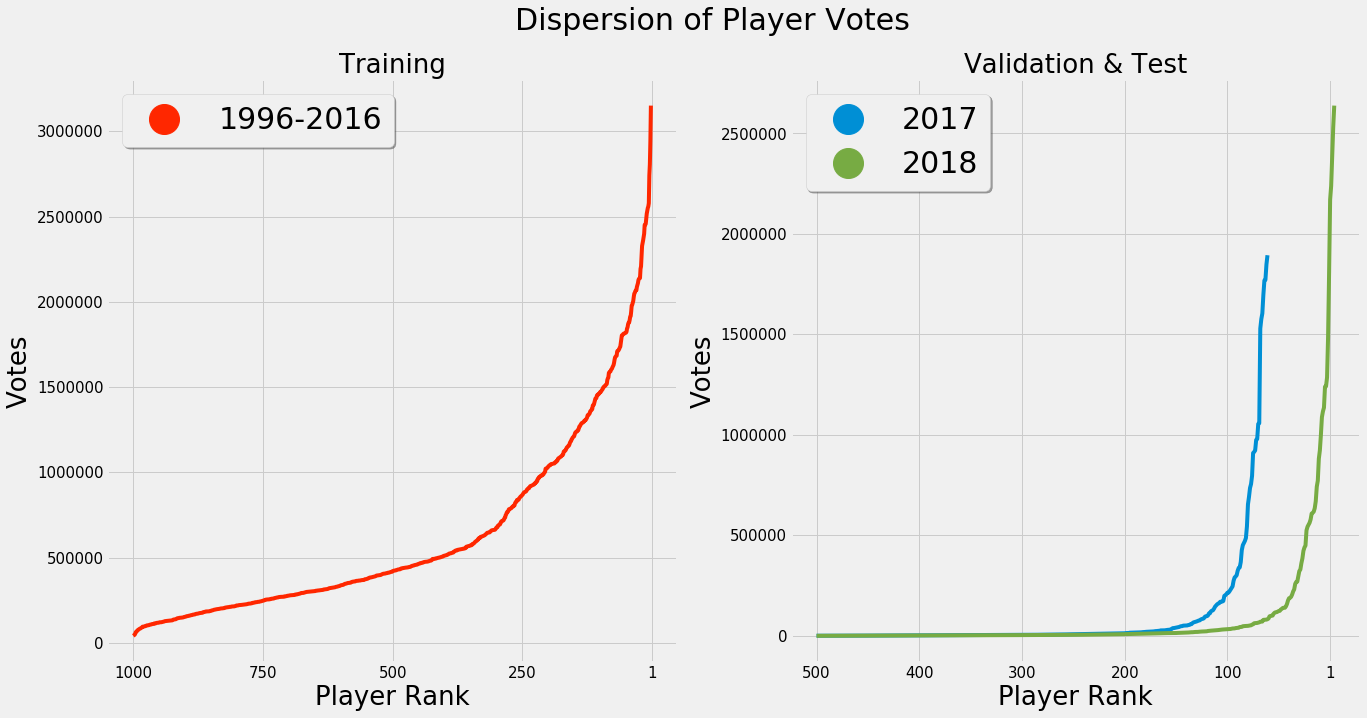

In [47]:
symbol = mlines.Line2D([], [],  color = '#FF2700', marker='o', linestyle='None',
                              markersize=30, label="1996-2016")
symbol2 = mlines.Line2D([], [],  color = '#008FD5', marker='o', linestyle='None',
                              markersize=30, label="2017")
symbol3 = mlines.Line2D([], [],  color = '#77AB43', marker='o', linestyle='None',
                              markersize=30, label="2018")

plt.figure(figsize=[20,10])

plt.suptitle('Dispersion of Player Votes',fontsize = 30)

plt.subplot(1,2,1) # (number of rows, number of columns, number of plot)
plt.plot(df_train_disp, color='#FF2700')
plt.title('Training',fontsize=26)
plt.xlabel('Player Rank', fontsize=26)
plt.ylabel('Votes', fontsize=26)
# plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(handles=[symbol],shadow = True,loc = 0, fontsize = 30)
plt.xticks(np.linspace(0,1000, 5), ["1000","750","500","250","1"],fontsize = 15)



plt.subplot(1,2,2)
plt.plot(df_val_disp)
plt.plot(df_test_disp,color='#77AB43');
plt.title('Validation & Test',fontsize=26);
plt.xlabel('Player Rank', fontsize=26)
plt.ylabel('Votes', fontsize=26)
plt.xticks(np.linspace(0,500, 6), ["500","400","300","200","100","1"],fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(handles=[symbol2,symbol3],shadow = True,loc = 0, fontsize = 30)

plt.savefig("Dispersion.png", bbox_inches='tight')


# Training Residuals

In [48]:
y_pred_train = m_lasso.predict(X_train_scaled)

In [49]:
test_train =[]
for i in y_train.values:
    test_train.append(i[0])

In [50]:
# plt.figure(figsize=(20,10))
# plt.scatter(test_train,test_train-y_pred_train)

# Validation Residuals

In [51]:
y_pred_val = m_lasso.predict(X_val_scaled)

In [52]:
test_val =[]
for i in y_val.values:
    test_val.append(i[0])

In [53]:
# plt.figure(figsize=(20,10));
# plt.scatter(test_val,test_val-y_pred_val)

# Test Residuals

In [54]:
y_pred = m_lasso.predict(X_test_scaled)

In [55]:
test=[]
for i in y_test.values:
    test.append(i[0])

In [56]:
# plt.figure(figsize=(20,10));
# plt.scatter(test,test-y_pred)

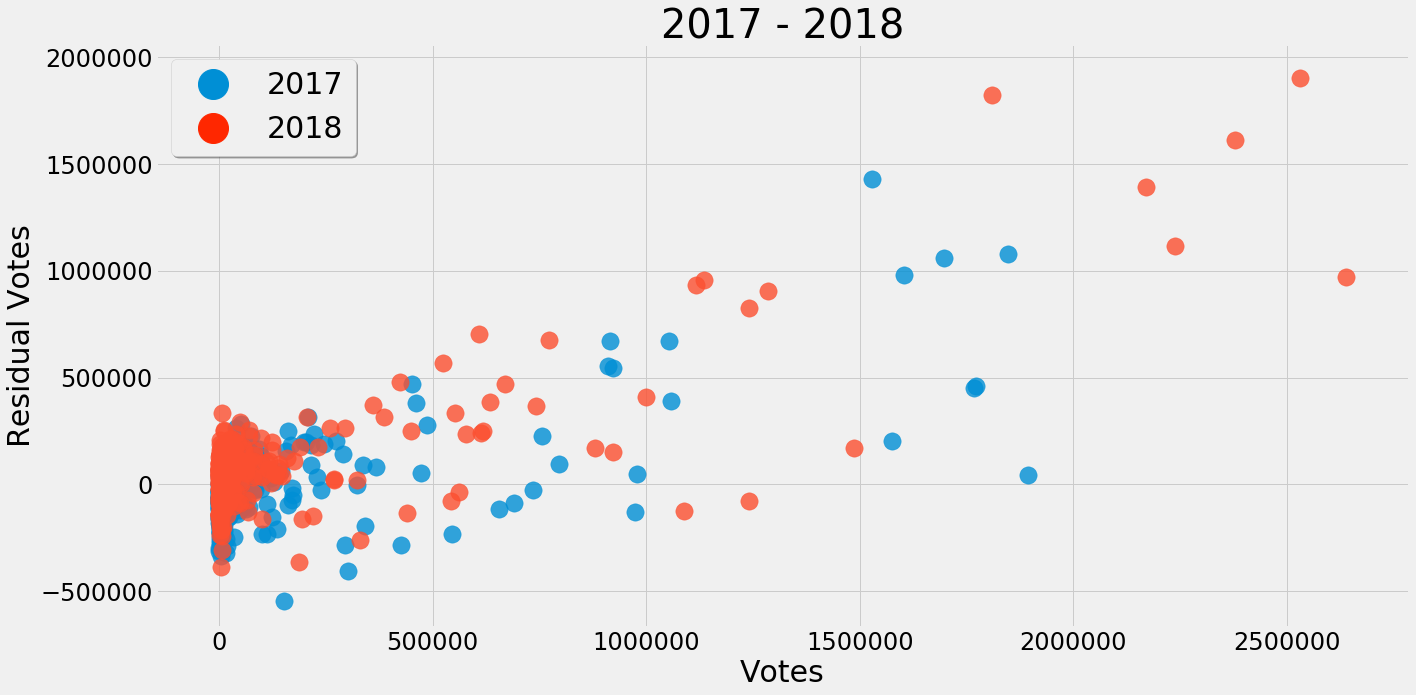

<Figure size 432x288 with 0 Axes>

In [57]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(test_val, test_val-y_pred_val,alpha=0.8,s =300)
ax.scatter(test, test-y_pred,alpha=0.8,s =300)
ax.set_title("2017 - 2018", fontsize = 40)

symbol = mlines.Line2D([], [],  color = '#008FD5', marker='o', linestyle='None',
                              markersize=30, label="2017")
symbol2 = mlines.Line2D([], [],  color = '#FF2700', marker='o', linestyle='None',
                              markersize=30, label="2018")

plt.legend(handles=[symbol,symbol2],shadow = True,loc = 0, fontsize = 30)

plt.xlabel('Votes', fontsize=30, color='black')
plt.ylabel('Residual Votes', fontsize=30, color='black')


plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)

plt.savefig("Residuals2.png", bbox_inches='tight')
    
    
plt.show()
plt.savefig("Residuals3.png")

# Get feature names/combinations

In [58]:
i_list = []
for i,j in enumerate(m_lasso.coef_):
    if j != 0:
        i_list.append(i)

In [59]:
# poly.get_feature_names()
poly_list = []
for i in i_list:
    poly_list.append(new_cols[i])

In [60]:
coef_list = []
for i in i_list:
    coef_list.append(m_lasso.coef_[i])

In [61]:
df_coef = pd.DataFrame(coef_list)
df_columns = pd.DataFrame(poly_list)

In [62]:
df_features = df_columns.merge(df_coef, how='outer', left_index=True, right_index=True)
df_features = df_features.sort_values('0_y',ascending = False)

In [63]:
df_features.head(10)

,0_x,0_y
0,Year_Age,332276.953009
16,FG PREV_STARS,164623.202984
2,PREV_STARS,161091.946746
21,FG% TOV_PCT,132473.552623
34,FTA PTS_PCT,116385.077932
40,PTS_PREV PREV_STARS,101985.536633
53,TRB_PCT Pos_PF,95406.290624
12,GS% PREV_STARS,94515.311110
4,Year_Age Age,92762.249671
15,FG PTS_PREV,89641.634514


In [64]:
df_features.tail(10)

,0_x,0_y
44,MP Pos_PF,-50901.742977
35,FTA Pos_PF,-52002.147420
25,Age FTA_PCT,-53623.207546
11,GS% STL_PCT,-55243.837345
29,Age PTS_PCT,-69507.080641
54,TRB_PCT Pos_SF,-71910.946231
26,Age PTS_PREV,-89900.480769
30,Age TOV_PCT,-156132.387053
31,Age PREV_STARS,-416034.436063
3,Year_Age^2,-504393.196780


In [65]:
# df_final_train = pd.DataFrame(X_train_scaled, columns=new_cols)
# df_final_train = df_final_train.drop(columns = '1')

# df_final_val= pd.DataFrame(X_val_scaled, columns=new_cols)
# df_final_val = df_final_val.drop(columns = '1')

# df_final_test = pd.DataFrame(X_test_scaled, columns=new_cols)
# df_final_test = df_final_test.drop(columns = '1')

In [66]:
## df_final_train = df_final_train[poly_list]
# df_final_train

# GRAPHS

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train[features+target].corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [ ]:
plt.figure(figsize=(50,50))
sns.pairplot(df_train[features+target], height=1.2, aspect=1.5);

In [67]:
df_all_mean = pd.DataFrame(df_all.groupby('Year')['Votes'].mean())

In [68]:
# df_all_mean.loc[1996:2018]

In [70]:
# plt.plot(df_train.groupby('Year')['Votes'].mean())
# plt.plot(df_all_mean.loc[1996:2018])

In [91]:
# plt.plot(df_train.groupby('Year')['Votes'].sum())
# plt.plot(df_all.groupby('Year')['Votes'].sum())

In [ ]:
# df_all_mean = pd.DataFrame(df_all.groupby('Year')['Votes'].mean())
# plt.plot(df_all_mean.loc[1996:2018])

In [71]:
# plt.plot(df_train.groupby('Year')['Votes'].max())
# plt.plot(df_all.groupby('Year')['Votes'].max())

# Highest Vote count graph

In [72]:
df_train_max = pd.DataFrame(df_train.groupby('Year')['Votes'].max())
df_all_max = pd.DataFrame(df_all.groupby('Year')['Votes'].max())

In [73]:
df_train_max = df_train_max.loc[1996:2018].reset_index()
df_all_max = df_all_max.loc[1996:2018].reset_index()

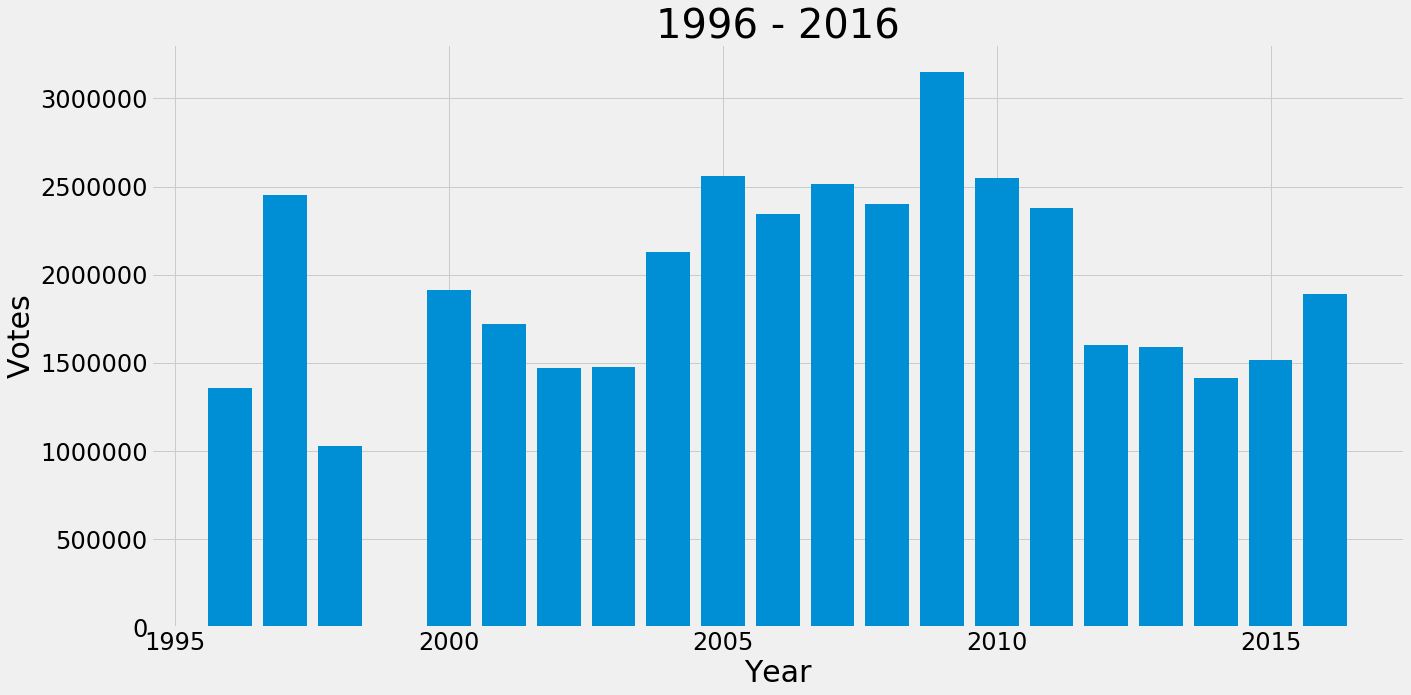

In [75]:
plt.figure(figsize=(20,10))
plt.bar(df_train_max['Year'],df_train_max['Votes'])

plt.title("1996 - 2016",fontsize=40)

plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)

plt.xlabel('Year', fontsize=30, color='black')
plt.ylabel('Votes', fontsize=30, color='black')

plt.savefig("max.png", bbox_inches='tight')

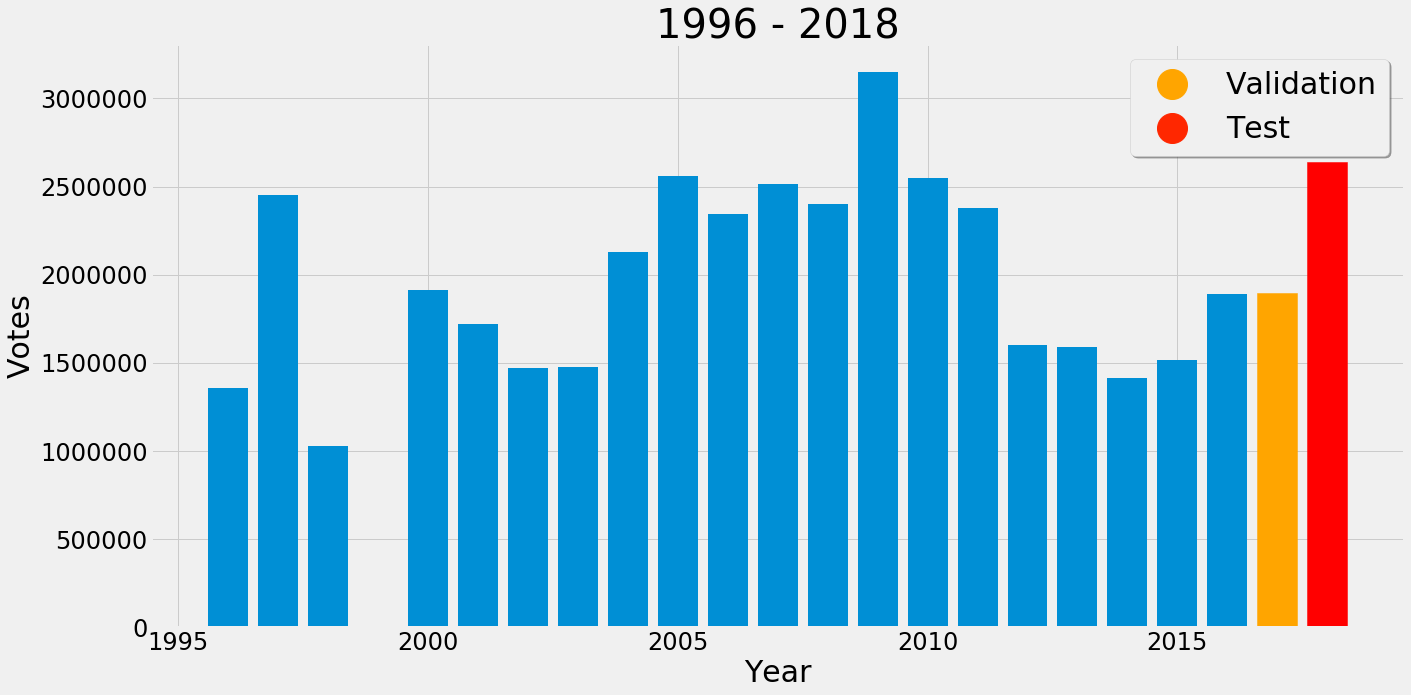

In [77]:
plt.figure(figsize=(20,10))
all_bar = plt.bar(df_all_max['Year'],df_all_max['Votes'])
all_bar[-2].set_color('orange')
all_bar[-1].set_color('r')

plt.title("1996 - 2018",fontsize=40)

plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)


symbol = mlines.Line2D([], [],  color = 'orange', marker='o', linestyle='None',
                              markersize=30, label="Validation")
symbol2 = mlines.Line2D([], [],  color = '#FF2700', marker='o', linestyle='None',
                              markersize=30, label="Test")

plt.legend(handles=[symbol,symbol2],shadow = True,loc = 0, fontsize = 30)

plt.xlabel('Year', fontsize=30, color='black')
plt.ylabel('Votes', fontsize=30, color='black')

plt.savefig("max2.png", bbox_inches='tight')

# Total Vote count graph

In [113]:
df_train_sum = pd.DataFrame(df_train.groupby('Year')['Votes'].sum())
df_all_sum = pd.DataFrame(df_all.groupby('Year')['Votes'].sum())

In [114]:
df_train_sum = df_train_sum.loc[1996:2018].reset_index()
df_all_sum = df_all_sum.loc[1996:2018].reset_index()

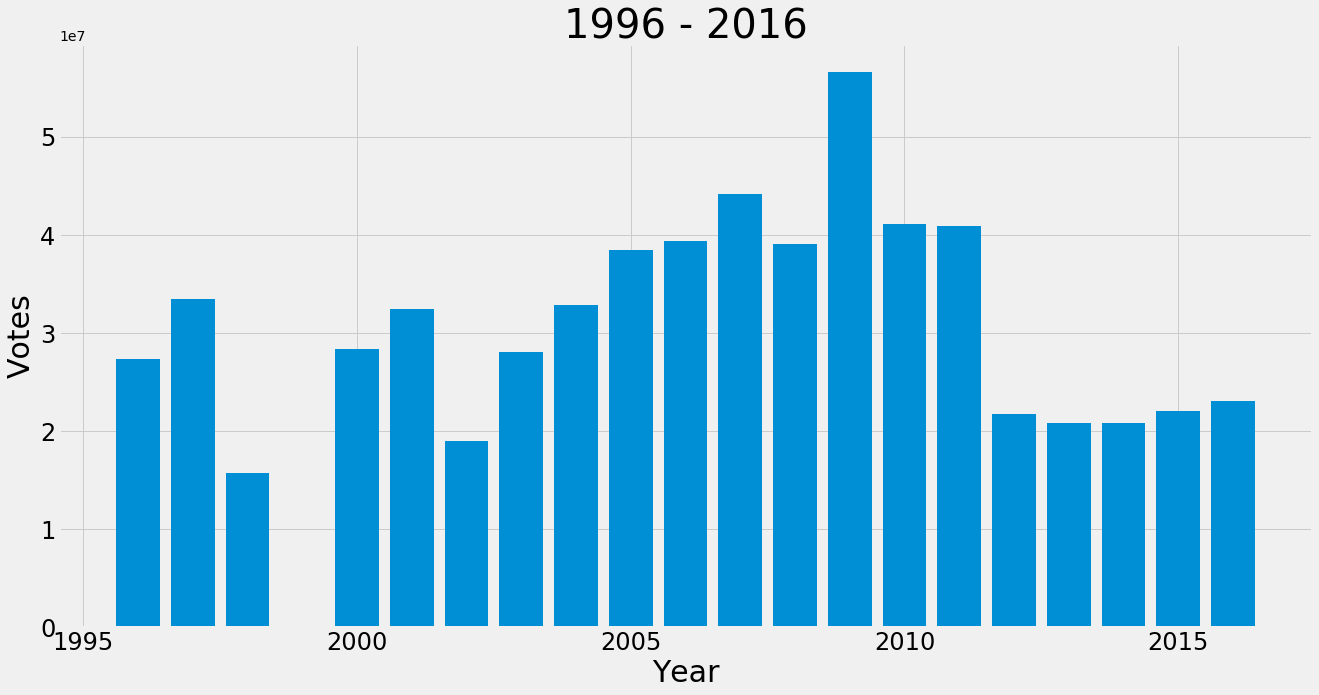

In [148]:
plt.figure(figsize=(20,10))
plt.bar(df_train_sum['Year'],df_train_sum['Votes'])

plt.title("1996 - 2016",fontsize=40)

plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)

plt.xlabel('Year', fontsize=30, color='black')
plt.ylabel('Votes', fontsize=30, color='black')

plt.savefig("sum.png", bbox_inches='tight')

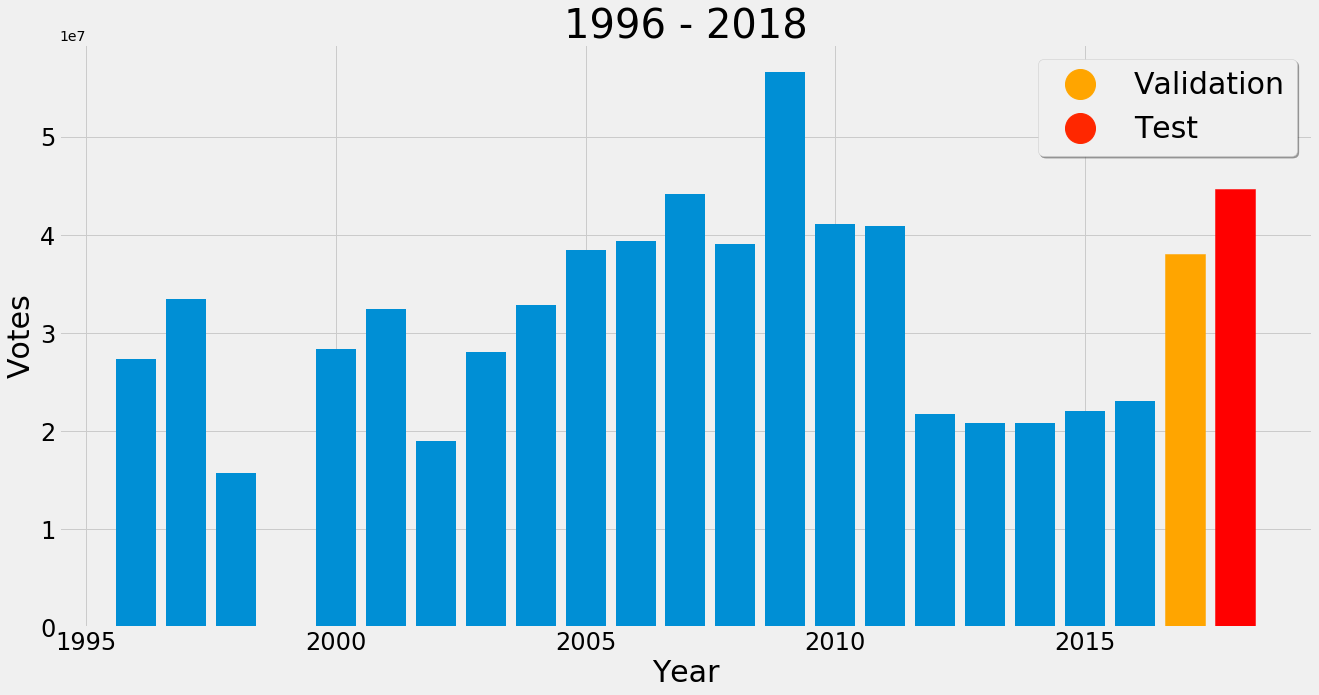

In [149]:
plt.figure(figsize=(20,10))
all_bar = plt.bar(df_all_sum['Year'],df_all_sum['Votes'])
all_bar[-2].set_color('orange')
all_bar[-1].set_color('r')

plt.title("1996 - 2018",fontsize=40)

plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)


symbol = mlines.Line2D([], [],  color = 'orange', marker='o', linestyle='None',
                              markersize=30, label="Validation")
symbol2 = mlines.Line2D([], [],  color = '#FF2700', marker='o', linestyle='None',
                              markersize=30, label="Test")

plt.legend(handles=[symbol,symbol2],shadow = True,loc = 0, fontsize = 30)

plt.xlabel('Year', fontsize=30, color='black')
plt.ylabel('Votes', fontsize=30, color='black')

plt.savefig("sum2.png", bbox_inches='tight')